In [6]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tqdm import tqdm
from ns_calculator import get_list_of_sample_files

In [4]:
# load the mean yields
df_mean_yields = pd.read_parquet('results/one-day-ahead/one-day-ahead_mean_yields.parquet')
# sort the index yields
df_mean_yields = df_mean_yields.sort_index()
df_mean_yields.head()

,DGS1MO,DGS3MO,DGS6MO,DGS1,DGS2,DGS3,DGS5,DGS7,DGS10,DGS20,DGS30
2016-08-21,0.518545,0.556787,0.612275,0.717237,0.905357,1.068192,1.332862,1.535198,1.757222,2.133905,2.288249
2016-08-22,0.599873,0.642384,0.703837,0.819333,1.023817,1.198116,1.475827,1.683267,1.905898,2.272331,2.419551
2016-08-23,0.606151,0.644660,0.700451,0.805716,0.993478,1.155050,1.415761,1.613496,1.829014,2.192377,2.341426
2016-08-24,0.615426,0.653849,0.709516,0.814548,1.001904,1.163148,1.423399,1.620884,1.836295,2.200229,2.349984
2016-08-25,0.596241,0.636402,0.694535,0.804049,0.998804,1.165746,1.433697,1.635592,1.854123,2.218301,2.366026


In [11]:
# get the min and max dates
min_date = df_mean_yields.index.min()
max_date = df_mean_yields.index.max()
print("Mean yields time period:", df_mean_yields.index.min(), "to", df_mean_yields.index.max())

Mean yields time period: 2016-08-21 00:00:00 to 2024-12-30 00:00:00


In [13]:
# load the actuals
dependent_varaibles = ['DGS1MO', 'DGS3MO', 'DGS6MO', 'DGS1', 'DGS2', 'DGS3', 'DGS5', 'DGS7', 'DGS10', 'DGS20', 'DGS30']
bond_yields = pd.read_parquet(
    '/Users/mma0277/Documents/Development/investment_analysis/tt-investment-analysis/data/project_work/fred_prorcessed_daily.parquet')
bond_yields = bond_yields[dependent_varaibles]
# get the index values from the data_bonds dataframe
bond_yields_train = bond_yields[(bond_yields.index.to_timestamp() <= max_date) &
                               (bond_yields.index.to_timestamp() >= min_date)]

print("Training set time period:", bond_yields_train.index.min(), "to", bond_yields_train.index.max())
print(bond_yields_train.shape)

Training set time period: 2016-08-21 to 2024-12-30
(3054, 11)


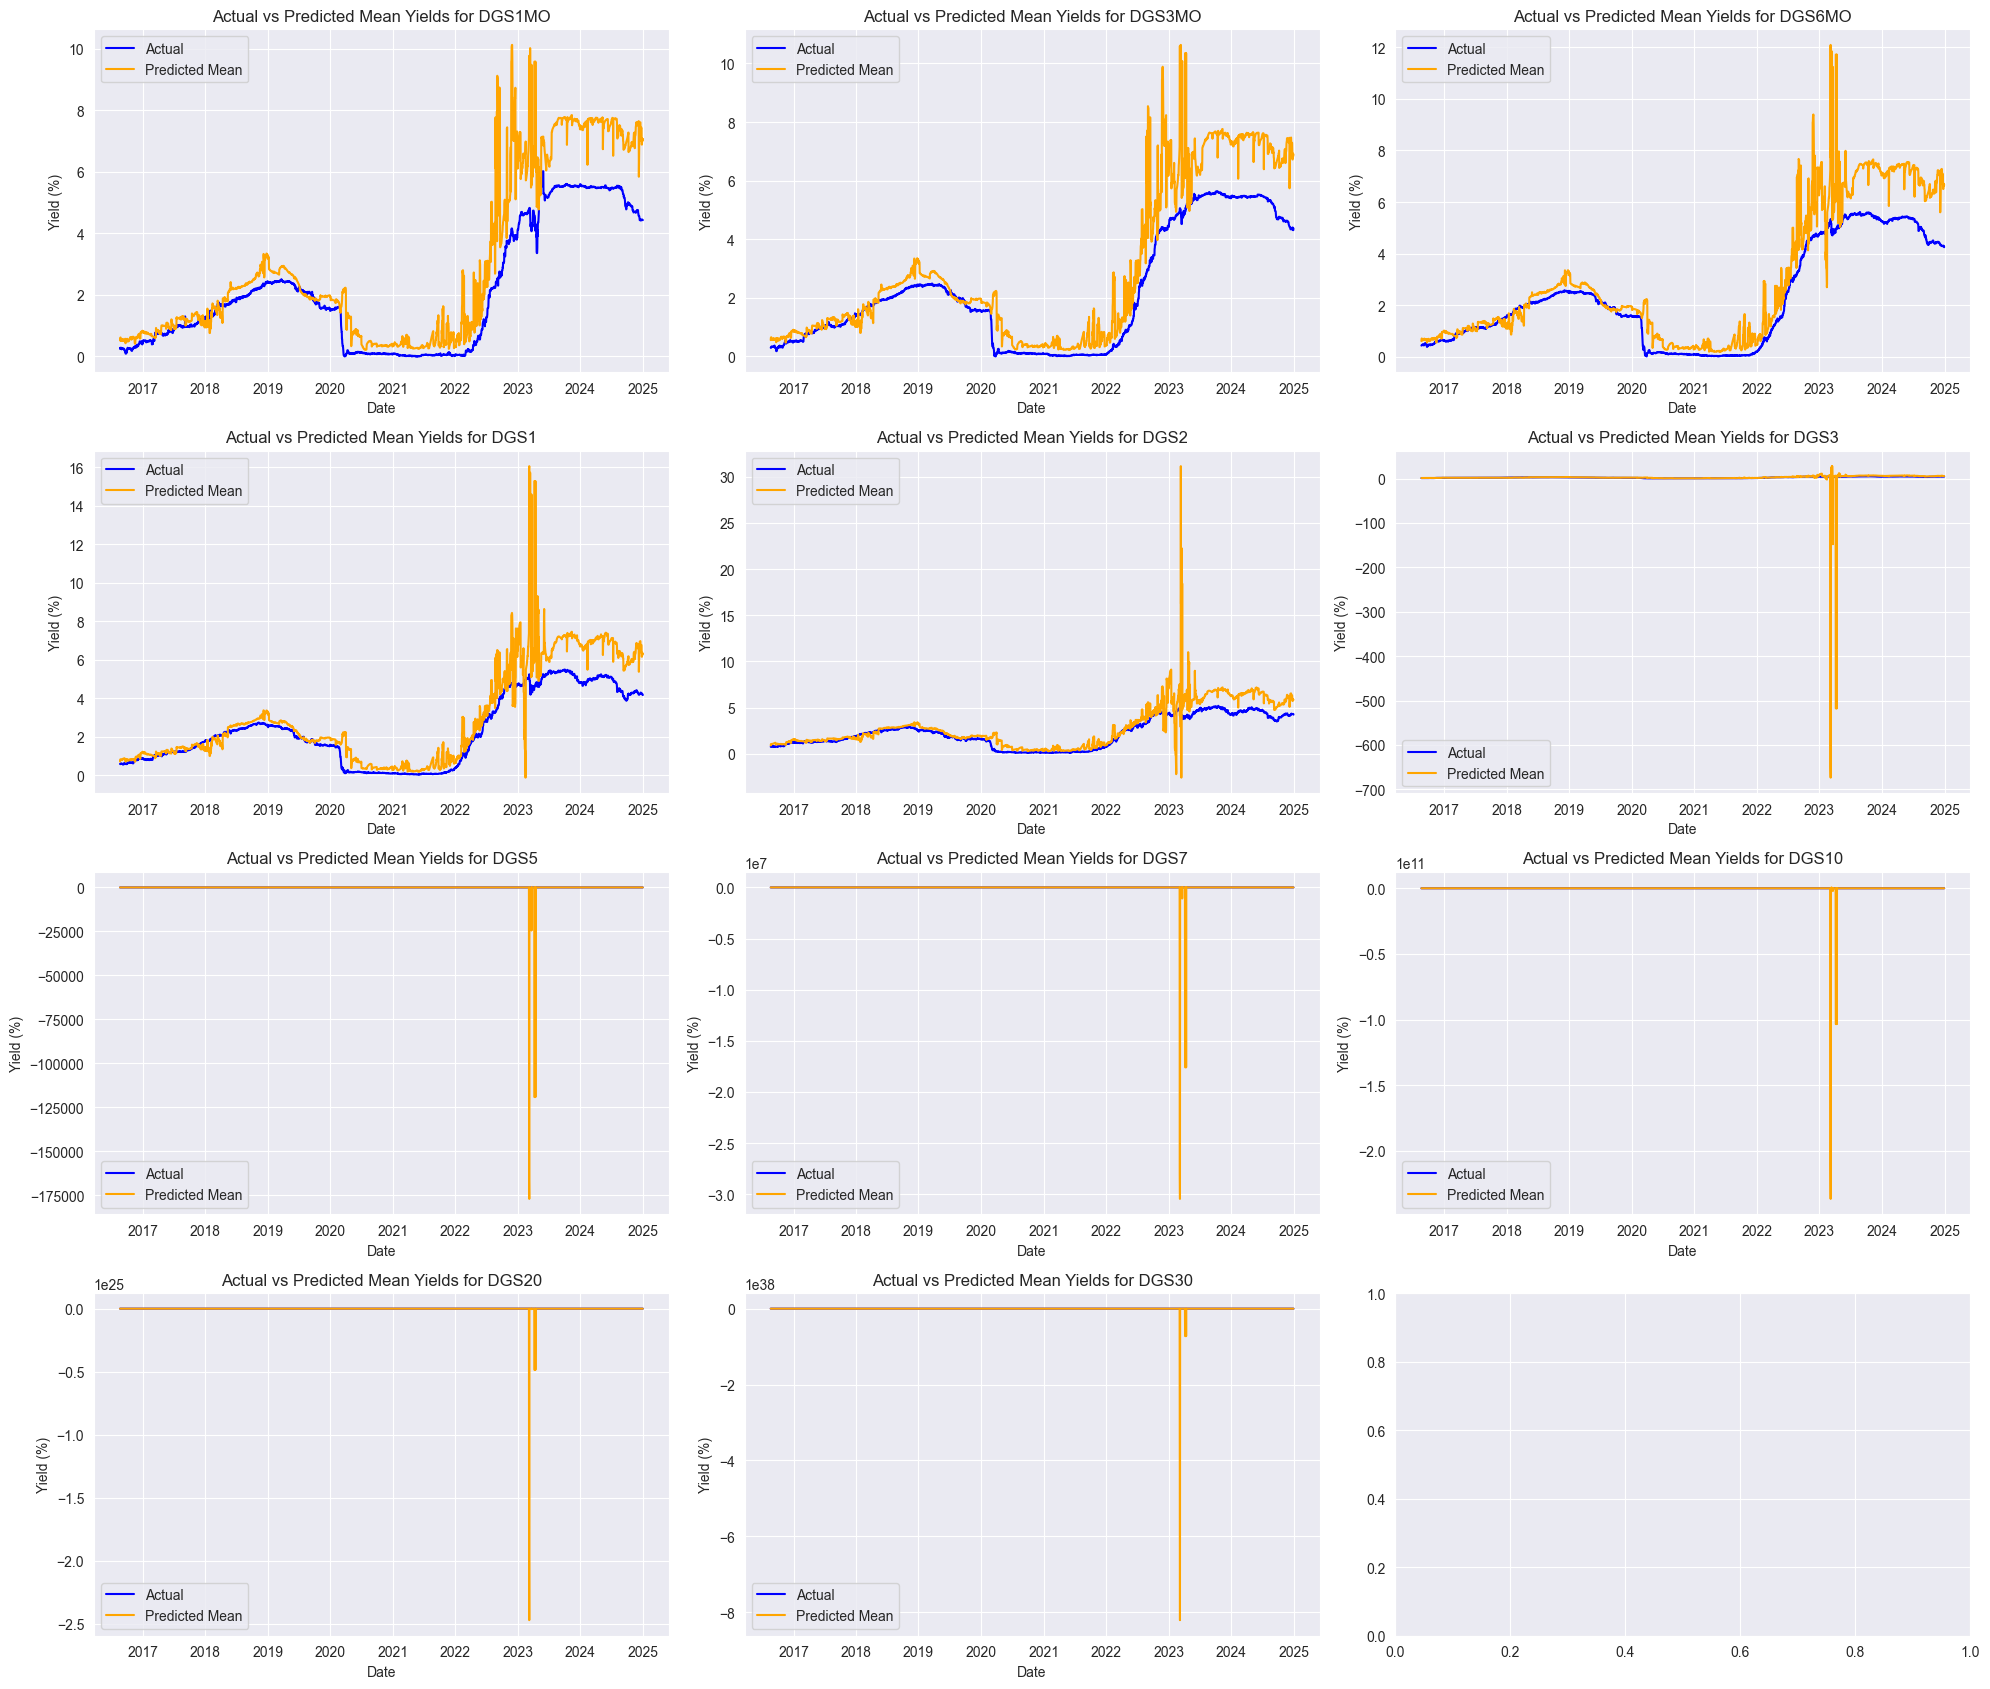

In [18]:
# create a subplot to compare the actual vs predicted mean yields for each dependent variable
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 17))
axes = axes.flatten()
for i, col in enumerate(dependent_varaibles):
    sns.lineplot(x=bond_yields_train.index.to_timestamp(), y=bond_yields_train[col], label='Actual', color='blue', ax=axes[i])
    sns.lineplot(x=df_mean_yields.index, y=df_mean_yields[col], label='Predicted Mean', color='orange', ax=axes[i])
    axes[i].set_title(f'Actual vs Predicted Mean Yields for {col}')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Yield (%)')
    axes[i].legend()
plt.tight_layout()
plt.show()